<a href="https://colab.research.google.com/github/rishi-29-02/Aspiration-Career-Launcher/blob/main/Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4

#Trade Call Prediction using Classification

In this module, we'd be covering the concept of classification and utilize our skills to solve the following queries – (Stock Price = Close Price)

#4.1

Import the csv file of the stock which contained the Bollinger columns as well.

Create a new column 'Call' , whose entries are -

'Buy' if the stock price is below the lower Bollinger band

'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band

'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band

'Short' if the stock price is above the upper Bollinger band

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
data = pd.read_csv('Module_2_Solutions.csv')
data.head()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VMAP,Day_Perc_Change,Trend,Scaled_Total_traded_Quantity,Scaled_volume,14_day_mov_av,14_day_mov_std,Upper Band,Lower Band
0,2017-06-01,HINDUNILVR,EQ,2017-06-01,1067.00,1067.00,1099.45,1061.2,1094.55,1095.35,1091.65,1782269,1.945607e+09,69057,1160309,65.10,6,2017,1031.278621,0.026570,Positive,0.280107,0.011521,1033.167857,34.162173,1101.492204,964.843511
1,2017-06-02,HINDUNILVR,EQ,2017-06-02,1095.35,1100.05,1103.00,1046.1,1085.00,1086.40,1083.08,2216247,2.400379e+09,40705,1803842,81.39,6,2017,1035.652294,-0.008171,Slight negative,0.351011,0.014438,1040.535714,33.688137,1107.911988,973.159441
2,2017-06-05,HINDUNILVR,EQ,2017-06-05,1086.40,1092.00,1101.30,1088.0,1095.00,1097.75,1096.57,612171,6.712884e+08,35182,355028,57.99,6,2017,1036.984099,0.010447,Positive,0.088934,0.003658,1047.489286,34.795276,1117.079837,977.898734
3,2017-06-06,HINDUNILVR,EQ,2017-06-06,1097.75,1097.95,1101.80,1087.0,1091.00,1091.55,1092.44,1203091,1.314305e+09,29449,915629,76.11,6,2017,1039.190997,-0.005648,Slight negative,0.185480,0.007629,1053.357143,34.804679,1122.966502,983.747784
4,2017-06-07,HINDUNILVR,EQ,2017-06-07,1091.55,1105.20,1114.25,1091.5,1106.00,1106.35,1107.07,2392047,2.648170e+09,81560,1666883,69.68,6,2017,1044.189572,0.013559,Positive,0.379733,0.015619,1061.650000,32.357005,1126.364010,996.935990


In [ ]:
data.shape

(481, 27)

Creating the new column Call and filling the values.

In [ ]:
data['call'] = ''
for i in range(data.shape[0]):
  if data['Close Price'][i] < data['Lower Band'][i]:
    data['call'][i] = 'Buy'
  elif data['Lower Band'][i] <= data['Close Price'][i] < data['14_day_mov_av'][i]:
    data['call'][i] = 'Hold Buy/ Liquidate Short'
  elif data['14_day_mov_av'][i] <= data['Close Price'][i] < data['Upper Band'][i]:
    data['call'][i] = 'Hold Short/ Liquidate Buy'
  elif data['Close Price'][i] >= data['Upper Band'][i]:
    data['call'][i] = 'Short'

Creating a new dataset for training and testing which contains 3 Bollinger columns and Stock price.
"Call" will be the output feature

In [ ]:
df = pd.DataFrame({'Upper Band': data['Upper Band'],
                   'Lower Band': data['Lower Band'],
                   'Close Price': data['Close Price'],
                   '14_daya_av': data['14_day_mov_av'],
                   'call': data['call']})
df

map = {'Buy':1, 'Hold Buy/ Liquidate Short':2, 'Hold Short/ Liquidate Buy':3, 'Short':4}
df['call'] = df['call'].map(map)
df.head()

,Upper Band,Lower Band,Close Price,14_daya_av,call
0,1101.492204,964.843511,1095.35,1033.167857,3
1,1107.911988,973.159441,1086.40,1040.535714,3
2,1117.079837,977.898734,1097.75,1047.489286,3
3,1122.966502,983.747784,1091.55,1053.357143,3
4,1126.364010,996.935990,1106.35,1061.650000,3


In [ ]:
X = df.iloc[:, 0:4].values
Y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import  cross_val_score

num_folds = 7
scoring = 'accuracy'

models = []
models.append(('lr', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('svc', SVC()))
models.append(('lsvc', LinearSVC()))
models.append(('gnb', GaussianNB()))
models.append(('dtr', DecisionTreeClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('sgdc', SGDClassifier()))
models.append(('rfc', RandomForestClassifier()))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=1)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print('%s : %f (%f)' % (name, cv_results.mean(), cv_results.std()))

lr : 0.962733 (0.022395)
knn : 0.751553 (0.067613)
svc : 0.670807 (0.066172)
lsvc : 0.708075 (0.153656)
gnb : 0.543478 (0.078811)
dtr : 0.729814 (0.082867)
gbc : 0.788820 (0.058924)
sgdc : 0.701863 (0.157070)
rfc : 0.767081 (0.056587)


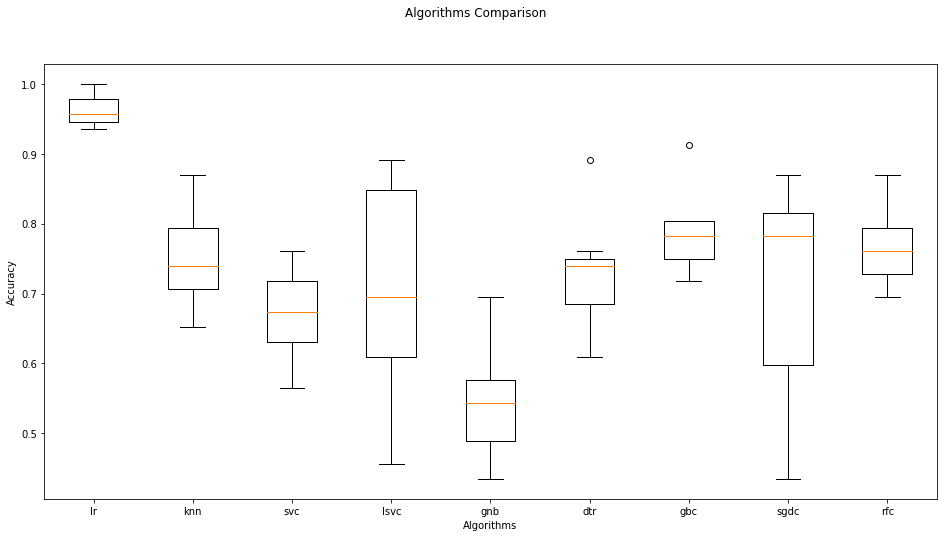

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
scores = model.score(x_test, y_test)
scores

0.9811320754716981

From the above analysis we conclude that LogisticRegression algorithms works way more better than other algorithms.

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
maruti_df = pd.read_csv('MARUTI.csv')
maruti_df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MARUTI,EQ,15-May-2017,6730.20,6759.4,6839.10,6733.45,6824.00,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
1,MARUTI,EQ,16-May-2017,6823.90,6850.0,6977.55,6830.00,6968.40,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
2,MARUTI,EQ,17-May-2017,6953.95,6950.0,6979.00,6885.85,6945.00,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
3,MARUTI,EQ,18-May-2017,6958.20,6918.3,6948.00,6814.45,6822.00,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
4,MARUTI,EQ,19-May-2017,6831.05,6854.8,6893.90,6691.55,6756.30,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,MARUTI,EQ,07-May-2019,6709.65,6744.9,6785.25,6680.00,6693.00,6702.00,6737.56,586684,3.952821e+09,69696,198757,33.88
492,MARUTI,EQ,08-May-2019,6702.00,6679.0,6693.00,6616.00,6650.00,6650.15,6655.70,552749,3.678929e+09,59897,228920,41.41
493,MARUTI,EQ,09-May-2019,6650.15,6637.0,6678.00,6600.00,6609.85,6624.95,6646.86,570000,3.788710e+09,71334,257451,45.17
494,MARUTI,EQ,10-May-2019,6624.95,6623.0,6664.90,6575.00,6630.00,6631.60,6622.41,608669,4.030855e+09,75423,247688,40.69


In [ ]:
maruti_df['14_day_mov_av'] = maruti_df['Close Price'].rolling(14).mean()
maruti_df['14_day_mov_std'] = maruti_df['Close Price'].rolling(14).std()

maruti_df['Upper Band'] = maruti_df['14_day_mov_av'] + 2 * maruti_df['14_day_mov_std']
maruti_df['Lower Band'] = maruti_df['14_day_mov_av'] - 2 * maruti_df['14_day_mov_std']

maruti_df.dropna(inplace=True)
maruti_df.reset_index(drop=True, inplace=True)
maruti_df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_mov_av,14_day_mov_std,Upper Band,Lower Band
0,MARUTI,EQ,01-Jun-2017,7211.00,7242.0,7245.00,7110.10,7150.00,7146.60,7165.03,649217,4.651661e+09,74481,276770,42.63,6964.135714,156.938370,7278.012455,6650.258974
1,MARUTI,EQ,02-Jun-2017,7146.60,7182.0,7187.70,7100.00,7110.60,7114.70,7135.00,310268,2.213762e+09,33719,153510,49.48,6984.907143,156.192360,7297.291863,6672.522422
2,MARUTI,EQ,05-Jun-2017,7114.70,7139.8,7161.90,7091.10,7116.05,7125.70,7126.86,296147,2.110599e+09,31551,137016,46.27,6997.175000,160.265639,7317.706277,6676.643723
3,MARUTI,EQ,06-Jun-2017,7125.70,7134.0,7154.30,7085.05,7118.95,7112.10,7110.16,324579,2.307810e+09,45217,197591,60.88,7008.167857,162.647064,7333.461986,6682.873728
4,MARUTI,EQ,07-Jun-2017,7112.10,7135.0,7225.00,7107.60,7198.00,7205.70,7189.75,518152,3.725381e+09,44672,192737,37.20,7034.928571,162.083831,7359.096234,6710.760909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,MARUTI,EQ,07-May-2019,6709.65,6744.9,6785.25,6680.00,6693.00,6702.00,6737.56,586684,3.952821e+09,69696,198757,33.88,7014.828571,311.025050,7636.878670,6392.778472
479,MARUTI,EQ,08-May-2019,6702.00,6679.0,6693.00,6616.00,6650.00,6650.15,6655.70,552749,3.678929e+09,59897,228920,41.41,6965.350000,309.924824,7585.199648,6345.500352
480,MARUTI,EQ,09-May-2019,6650.15,6637.0,6678.00,6600.00,6609.85,6624.95,6646.86,570000,3.788710e+09,71334,257451,45.17,6913.382143,300.879733,7515.141609,6311.622677
481,MARUTI,EQ,10-May-2019,6624.95,6623.0,6664.90,6575.00,6630.00,6631.60,6622.41,608669,4.030855e+09,75423,247688,40.69,6854.314286,264.606965,7383.528216,6325.100356


In [ ]:
maruti_df['call'] = ''
for j in range(maruti_df.shape[0]):
  if maruti_df['Close Price'][j] < maruti_df['Lower Band'][j]:
    maruti_df['call'][j] = 'Buy'
  elif maruti_df['Lower Band'][j] <= maruti_df['Close Price'][j] < maruti_df['14_day_mov_av'][j]:
    maruti_df['call'][j] = 'Hold Buy/ Liquidate Short'
  elif maruti_df['14_day_mov_av'][j] <= maruti_df['Close Price'][j] < maruti_df['Upper Band'][j]:
    maruti_df['call'][j] = 'Hold Short/ Liquidate Buy'
  elif maruti_df['Close Price'][j] >= maruti_df['Upper Band'][j]:
    maruti_df['call'][j] = 'Short'

In [ ]:
maruti_data = pd.DataFrame({'Upper Band': maruti_df['Upper Band'],
                   'Lower Band': maruti_df['Lower Band'],
                   'Close Price': maruti_df['Close Price'],
                   '14_daya_av': maruti_df['14_day_mov_av'],
                   'call': maruti_df['call']})


map = {'Buy':1, 'Hold Buy/ Liquidate Short':2, 'Hold Short/ Liquidate Buy':3, 'Short':4}
maruti_data['call'] = maruti_data['call'].map(map)
maruti_data.head()

,Upper Band,Lower Band,Close Price,14_daya_av,call
0,7278.012455,6650.258974,7146.6,6964.135714,3
1,7297.291863,6672.522422,7114.7,6984.907143,3
2,7317.706277,6676.643723,7125.7,6997.175000,3
3,7333.461986,6682.873728,7112.1,7008.167857,3
4,7359.096234,6710.760909,7205.7,7034.928571,3


In [ ]:
x = maruti_data.iloc[:, 0:4].values
y = maruti_data.iloc[:, 4].values

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=2)

model.fit(X_train,  Y_train)
predictions = model.predict(X_test)
predictions

array([3, 2, 2, 2, 3, 2, 2, 2, 2, 4, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2,
       2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3,
       3, 2, 3, 1, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 4, 2, 3, 2, 2, 1, 2, 4,
       2, 4, 3, 2, 3, 3, 3, 3, 2, 4, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 4, 3,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 4, 3, 4, 3, 3, 2, 2, 2, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 4, 1, 3, 3, 3,
       2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 3, 3])

Predictions for the calls of new dataset are made.

# 4.2

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

Import the stock data file of your choice

Define 4 new columns , whose values are:

% change between Open and Close price for the day

% change between Low and High price for the day

5 day rolling mean of the day to day % change in Close Price

5 day rolling std of the day to day % change in Close Price

Create a new column 'Action' whose values are:

1 if next day's price(Close) is greater than present day's.

(-1) if next day's price(Close) is less than present day's.

i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]

i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

Construct a classification model with the 4 new inputs and 'Action' as target

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
data = pd.read_csv('HINDUNILVR.csv')
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HINDUNILVR,EQ,15-May-2017,980.20,981.3,988.85,974.55,982.5,983.25,980.72,734446,7.202888e+08,32976,420159,57.21
1,HINDUNILVR,EQ,16-May-2017,983.25,983.0,1002.50,982.05,999.5,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53
2,HINDUNILVR,EQ,17-May-2017,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82
3,HINDUNILVR,EQ,18-May-2017,1009.40,1008.0,1009.00,983.00,987.5,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55
4,HINDUNILVR,EQ,19-May-2017,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78


Creating the four new columns.

In [ ]:
data['P_oc'] = ((data['Open Price'] - data['Close Price'])/data['Close Price']) * 100
data['P_lh'] = ((data['Low Price'] - data['High Price'])/data['High Price']) * 100
data['5_day_roll_mean'] = data['Close Price'].pct_change().dropna().rolling(5).mean()
data['5_day_roll_std'] = data['Close Price'].pct_change().dropna().rolling(5).std()
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,P_oc,P_lh,5_day_roll_mean,5_day_roll_std
0,HINDUNILVR,EQ,22-May-2017,1008.00,1011.35,1028.20,1009.0,1019.80,1018.60,1019.74,1788720,1.824026e+09,51057,808117,45.18,-0.711761,-1.867341,0.007182,0.015158
1,HINDUNILVR,EQ,23-May-2017,1018.60,1018.80,1032.00,1014.0,1023.50,1024.80,1027.17,2640069,2.711793e+09,72246,1946513,73.73,-0.585480,-1.744186,0.004910,0.014047
2,HINDUNILVR,EQ,24-May-2017,1024.80,1026.55,1040.00,1023.5,1038.05,1038.05,1032.11,1992083,2.056057e+09,42418,1341093,67.32,-1.107846,-1.586538,0.005697,0.014437
3,HINDUNILVR,EQ,25-May-2017,1038.05,1037.90,1050.00,1030.3,1045.00,1043.45,1041.56,1918721,1.998463e+09,67399,1255478,65.43,-0.531889,-1.876190,0.010532,0.005210
4,HINDUNILVR,EQ,26-May-2017,1043.45,1042.05,1046.95,1032.4,1041.00,1040.95,1040.43,716421,7.453837e+08,26030,367491,51.30,0.105673,-1.389751,0.006468,0.005883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.5,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,-1.101620,-2.244433,-0.005666,0.016283
486,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.0,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,0.521111,-1.325479,-0.007887,0.015015
487,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.0,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,-1.388114,-2.101576,-0.002219,0.014918
488,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.5,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,1.274112,-1.784669,-0.000651,0.013240


In [ ]:
data['Action'] = ''
for i in range(data.shape[0]-1):
  if data['Close Price'][i+1]>data['Close Price'][i]:
    data['Action'][i] = 1
  elif data['Close Price'][i+1]<data['Close Price'][i]:
    data['Action'][i] = -1    
  else:
    data['Action'] = np.NaN
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,P_oc,P_lh,5_day_roll_mean,5_day_roll_std,Action
0,HINDUNILVR,EQ,22-May-2017,1008.00,1011.35,1028.20,1009.0,1019.80,1018.60,1019.74,1788720,1.824026e+09,51057,808117,45.18,-0.711761,-1.867341,0.007182,0.015158,NaN
1,HINDUNILVR,EQ,23-May-2017,1018.60,1018.80,1032.00,1014.0,1023.50,1024.80,1027.17,2640069,2.711793e+09,72246,1946513,73.73,-0.585480,-1.744186,0.004910,0.014047,NaN
2,HINDUNILVR,EQ,24-May-2017,1024.80,1026.55,1040.00,1023.5,1038.05,1038.05,1032.11,1992083,2.056057e+09,42418,1341093,67.32,-1.107846,-1.586538,0.005697,0.014437,NaN
3,HINDUNILVR,EQ,25-May-2017,1038.05,1037.90,1050.00,1030.3,1045.00,1043.45,1041.56,1918721,1.998463e+09,67399,1255478,65.43,-0.531889,-1.876190,0.010532,0.005210,NaN
4,HINDUNILVR,EQ,26-May-2017,1043.45,1042.05,1046.95,1032.4,1041.00,1040.95,1040.43,716421,7.453837e+08,26030,367491,51.30,0.105673,-1.389751,0.006468,0.005883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.5,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,-1.101620,-2.244433,-0.005666,0.016283,-1.0
486,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.0,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,0.521111,-1.325479,-0.007887,0.015015,1.0
487,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.0,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,-1.388114,-2.101576,-0.002219,0.014918,-1.0
488,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.5,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,1.274112,-1.784669,-0.000651,0.013240,1.0


In [ ]:
data_1 = data[['P_oc', 'P_lh', '5_day_roll_mean',	'5_day_roll_std', 'Action']].dropna()
data_1

,P_oc,P_lh,5_day_roll_mean,5_day_roll_std,Action
456,0.000000,0.000000,-0.005755,0.009852,-1.0
457,0.566133,-1.769522,-0.002402,0.003718,-1.0
458,0.008961,-1.629630,-0.002803,0.003567,1.0
459,-0.231619,-1.037510,-0.001861,0.005164,-1.0
460,0.190386,-1.920600,-0.000794,0.004281,1.0
461,0.065325,-1.099291,-0.000425,0.004443,1.0
462,-0.673775,-1.223108,0.003421,0.006607,-1.0
463,1.183432,-2.053621,0.001953,0.008727,-1.0
464,0.355629,-0.995875,0.000427,0.008520,-1.0
465,0.670338,-1.064271,-0.001155,0.009686,-1.0


In [ ]:
x_1 = data_1.iloc[:, 0:4].values
y_1 = data_1.iloc[:, 4].values

x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.33, random_state=3)

random_forest = RandomForestClassifier(n_estimators=100, max_features=2)
random_forest.fit(x_1_train, y_1_train)

from sklearn.metrics import accuracy_score

predictions = random_forest.predict(x_1_test)
accuracy = round(accuracy_score(y_1_test, predictions)*100, 2)
accuracy

63.64

In [ ]:
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,P_oc,P_lh,5_day_roll_mean,5_day_roll_std,Action
0,HINDUNILVR,EQ,22-May-2017,1008.00,1011.35,1028.20,1009.0,1019.80,1018.60,1019.74,1788720,1.824026e+09,51057,808117,45.18,-0.711761,-1.867341,0.007182,0.015158,NaN
1,HINDUNILVR,EQ,23-May-2017,1018.60,1018.80,1032.00,1014.0,1023.50,1024.80,1027.17,2640069,2.711793e+09,72246,1946513,73.73,-0.585480,-1.744186,0.004910,0.014047,NaN
2,HINDUNILVR,EQ,24-May-2017,1024.80,1026.55,1040.00,1023.5,1038.05,1038.05,1032.11,1992083,2.056057e+09,42418,1341093,67.32,-1.107846,-1.586538,0.005697,0.014437,NaN
3,HINDUNILVR,EQ,25-May-2017,1038.05,1037.90,1050.00,1030.3,1045.00,1043.45,1041.56,1918721,1.998463e+09,67399,1255478,65.43,-0.531889,-1.876190,0.010532,0.005210,NaN
4,HINDUNILVR,EQ,26-May-2017,1043.45,1042.05,1046.95,1032.4,1041.00,1040.95,1040.43,716421,7.453837e+08,26030,367491,51.30,0.105673,-1.389751,0.006468,0.005883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,HINDUNILVR,EQ,07-May-2019,1668.90,1678.80,1710.90,1672.5,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,-1.101620,-2.244433,-0.005666,0.016283,-1.0
486,HINDUNILVR,EQ,08-May-2019,1697.50,1697.50,1697.50,1675.0,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,0.521111,-1.325479,-0.007887,0.015015,1.0
487,HINDUNILVR,EQ,09-May-2019,1688.70,1680.10,1713.00,1677.0,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,-1.388114,-2.101576,-0.002219,0.014918,-1.0
488,HINDUNILVR,EQ,10-May-2019,1703.75,1708.95,1709.00,1678.5,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,1.274112,-1.784669,-0.000651,0.013240,1.0


Plotting the net cumulative returns.

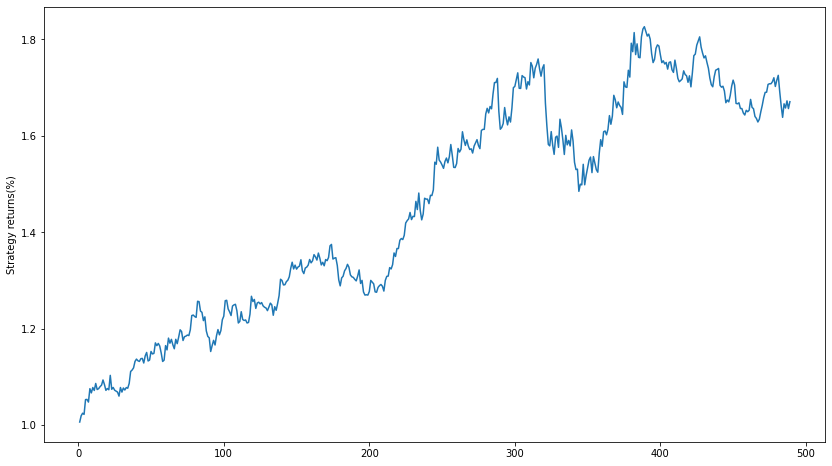

In [ ]:
data['pct_change'] = data['Close Price'].pct_change()
data['cumulative_ret'] = (data['pct_change'] + 1).cumprod()

plt.figure(figsize=(14, 8))
plt.plot(data['cumulative_ret'])
plt.ylabel('Strategy returns(%)')
plt.show()